### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [254]:
data = pd.read_csv('coupons.csv')

In [255]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [256]:
# At first we apply set option to see all columns and row, if we want, to have a better idea about the data 
 # Set the max_columns option to None to display all columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()
#data.tail(200)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Result: In Column age we have "below 21" and "50plus", then we should change it into number 

2. Investigate the dataset for missing or problematic data.

In [257]:
## Let lock at data information or shape in general 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [258]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Result: In coulmn 'toCoupon_GEQ5min', mean, max, %25, %50, and %75 are the same, then we should take care about it.  

In [259]:
## check the missing data for all columns 
null_data = data.isnull().sum()
non_null_data = data.notnull().sum()
print(' Number of null data in each column')
print(null_data)
print('-------------------')
print(' Number of Not null data for each column')
print(non_null_data)

 Number of null data in each column
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
-------------------
 Number of Not null data for each column
destination             12684
passanger               12684
weather                 12684
temperature         

In [260]:
# Find can also sort the columns with attention to the null values.
null_data = data.isnull().sum()
num_cull_data = null_data[null_data > 0].sort_values(ascending=False)
print ('Number of ull data \n', num_cull_data)

Number of ull data 
 car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64


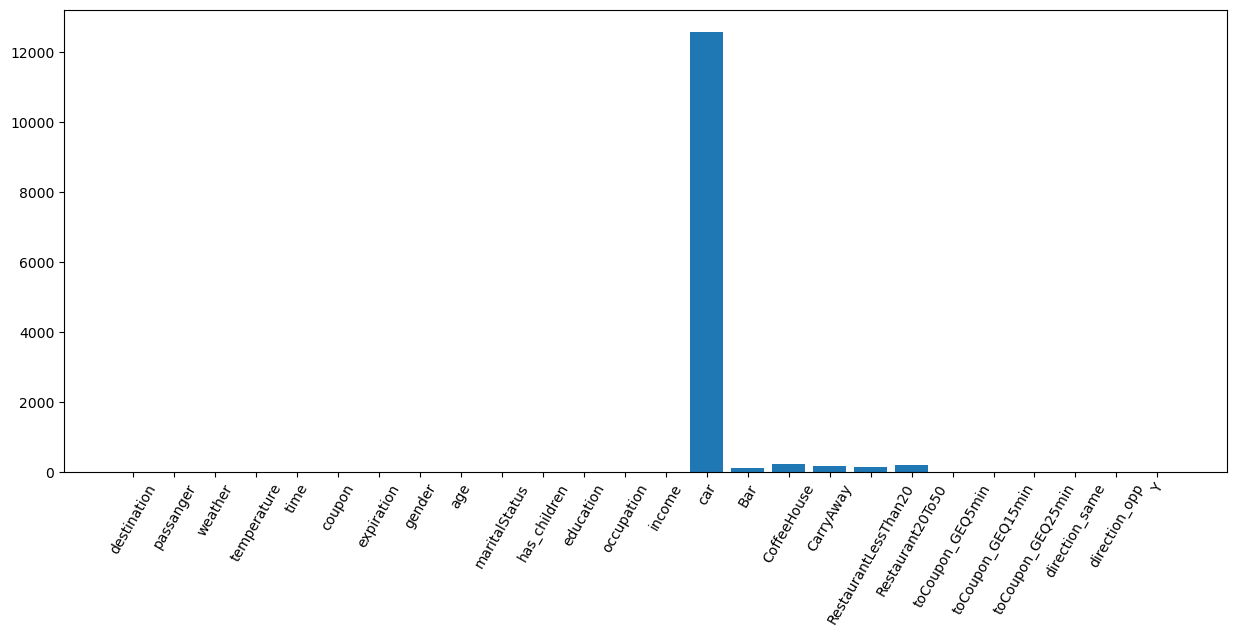

In [261]:
# We can also check the mssing data in histogram 
# we check null_data, here sorted too  
# we also use rotation to have good histogram
plt.figure(figsize=(15,6))
#missing_values_count = df.isnull().sum().sort_values()
plt.bar(data.columns, null_data)
plt.xticks(rotation=60)
plt.savefig('figures/mising_data_histogram.png')
plt.show()

### Results: 
### 1- column "car" should be deleted. 
### 2- Null data in other columns are small part of the total data, then we can fill them with mode 

3. Decide what to do about your missing data -- drop, replace, other...

In [262]:
# Missing data strategy
###########################################
# At first, we drop car column as we find it is not relevant data 
data.drop(columns = "car", axis = 1, inplace = True)

###########################################
#  We list here the columns that have null data, 
# As we found in "null_data = data.isnull().sum()" previously
# Then we fill the null data with the mode, as percent of null data for each column is very low 
md = data.isnull().sum()
md = md[md > 0]
for i in md.index:
    data[i] = data[i].fillna(data[i].mode()[0])

# After droping the unrelevant data and filling the missing data with the mode, we check again that we have missing data or not
print ('number of missig data after filling with mode', data.isnull().sum())


#########################################
# Now we can focus on column age to manipulate it 
# At first we print Age column unique values to see the results 
print ('\n unique data for column age')
print(data['age'].unique())

# Then convert 'age' column from text to numerical and also change "50puls" and "below21" too. 
data['age'] = data['age'].str.replace('50plus', '50', regex=False)
data['age'] = data['age'].str.replace('below21','20', regex=False)
data['age'] = pd.to_numeric(data['age'])
print ('\n unique data for column age after changing to numeric')
print(data['age'].unique())

number of missig data after filling with mode destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

 unique data for column age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

 unique data for column age after changing to numeric
[21 46 26 31 41 50 36 20]


4. What proportion of the total observations chose to accept the coupon


In [263]:
# proportion of "the total observations chose to accept the coupon"
coupon_num_accept = data['Y'].value_counts()
print(coupon_num_accept)

# We calculate the proportation then print it 
percent_accepted = coupon_num_accept[1]/(coupon_num_accept[0] + coupon_num_accept[1])

print('Proportion of the total observations that chose to accept the coupon: {:,.2%}'.format(percent_accepted))

Y
1    7210
0    5474
Name: count, dtype: int64
Proportion of the total observations that chose to accept the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

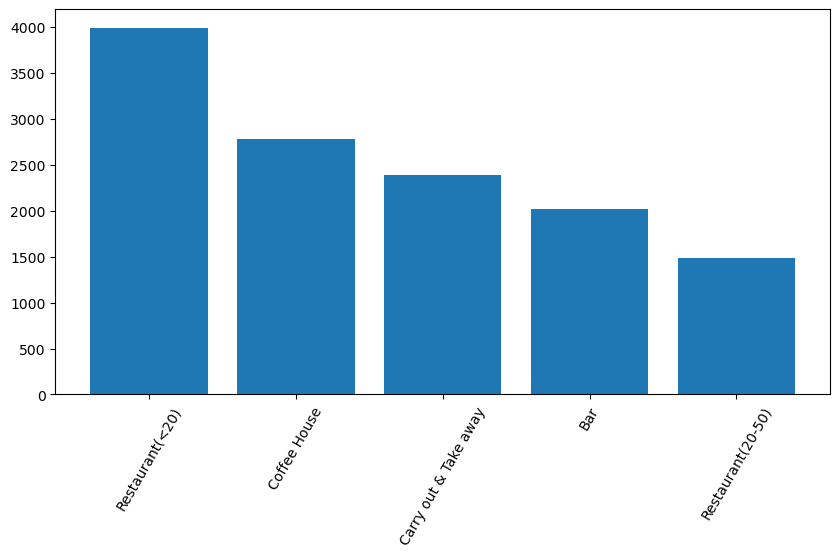

In [264]:
# Using bar plot to visualize the coupon column
# At first we extract coupon number and coupon unique then have plot 

coupon_num = data['coupon'].value_counts()
coupon_unique = data['coupon'].unique()
plt.figure(figsize=(10,5))
plt.bar(coupon_unique, coupon_num)
plt.xticks(rotation=60) 
plt.savefig('figures/coupon_bar.png')
plt.show()

   6. Use a histogram to visualize the temperature column.

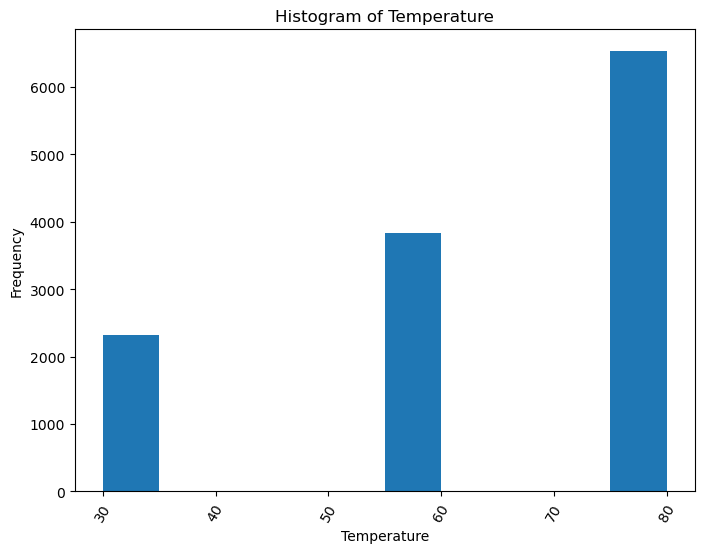

In [265]:
#  Visualizing the temperature column with histogram
plt.figure(figsize=(8,6))
plt.hist(data['temperature'])
plt.title('Histogram of Temperature')
plt.xticks(rotation=60)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('figures/temperature_bar.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [266]:
# Create a new DataFrame that contains just the bar coupons
#At first print unique to see bar coupons 
print ("------------------------------")
print ('differrent kinds of coupon: \n', data['coupon'].unique()) 
print ("------------------------------")

# Then we create nwe DataFrame 
coupons_bar = data[data['coupon'] == 'Bar']

#We also check the data randomly 
coupons_bar.sample(10)

------------------------------
differrent kinds of coupon: 
 ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
------------------------------


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11241,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,36,Married partner,1,Bachelors degree,Unemployed,$87500 - $99999,less1,less1,less1,less1,less1,1,1,0,0,1,0
11458,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,41,Married partner,1,Some college - no degree,Education&Training&Library,$100000 or More,never,gt8,gt8,gt8,4~8,1,1,0,0,1,1
12372,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Unemployed,$12500 - $24999,1~3,less1,4~8,1~3,less1,1,1,0,0,1,1
3890,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50,Single,0,Bachelors degree,Computer & Mathematical,$75000 - $87499,1~3,never,1~3,4~8,1~3,1,0,0,0,1,1
10407,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,26,Unmarried partner,0,Bachelors degree,Community & Social Services,$37500 - $49999,less1,never,1~3,less1,never,1,0,0,0,1,0
8562,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Female,21,Married partner,1,Associates degree,Unemployed,$50000 - $62499,never,1~3,1~3,1~3,1~3,1,1,0,0,1,0
8818,Home,Alone,Sunny,80,6PM,Bar,2h,Male,36,Married partner,1,Graduate degree (Masters or Doctorate),Computer & Mathematical,$100000 or More,never,never,less1,1~3,1~3,1,0,0,1,0,0
7600,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Female,36,Unmarried partner,1,Some college - no degree,Computer & Mathematical,$12500 - $24999,never,1~3,less1,1~3,4~8,1,1,0,0,1,1
7950,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,31,Unmarried partner,1,Bachelors degree,Computer & Mathematical,$62500 - $74999,never,4~8,4~8,gt8,4~8,1,1,0,0,1,0
2638,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,1,Bachelors degree,Management,$100000 or More,4~8,never,4~8,4~8,1~3,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [267]:
# Bar coupons were accepted (%)
# At first count the accepted

copouns_bar_accepted = coupons_bar['Y'].value_counts()
print(copouns_bar_accepted)

# Then we calculate the proportation and also print it 
percent_accepted = copouns_bar_accepted[1]/(copouns_bar_accepted[0] + copouns_bar_accepted[1])
print('Proportion of the total observations that chose to accept the coupon: {:,.2%}'.format(percent_accepted))

Y
0    1190
1     827
Name: count, dtype: int64
Proportion of the total observations that chose to accept the coupon: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [268]:
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
# At first we check the general conidtion of bar coupons
print ("--------------------------------------")
bar_coupons_count = coupons_bar['Bar'].value_counts()
print(bar_coupons_count)

# Coupons Accepted for those who went to a bar 3 or fewer times a month
print ("------bar coupons for 3 time or few per month------")
bar_coupons_3orfew = coupons_bar[coupons_bar['Bar'] == '1~3']
accepted_bar_3orfew = bar_coupons_3orfew['Y'].value_counts()
print(accepted_bar_3orfew)

# percent of bar coupons accepted
percent_accepted = accepted_bar_3orfew[1]/(accepted_bar_3orfew[0] + accepted_bar_3orfew[1])
print("Percent of visitors (between 1 to 3 times per month) accepted coupons: {:.1f}%".format(percent_accepted))

--------------------------------------
Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
------bar coupons for 3 time or few per month------
Y
1    257
0    140
Name: count, dtype: int64
Percent of visitors (between 1 to 3 times per month) accepted coupons: 0.6%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?



 Coupons Accepted for those who went to a bar more than once a month and are also more than 25 is about 0.70 percent

 Coupons Accepted by all others is about 0.39 percent

 There is remarkable differece of acceptance between two groups (diffrence between them is about 0.30 percent)


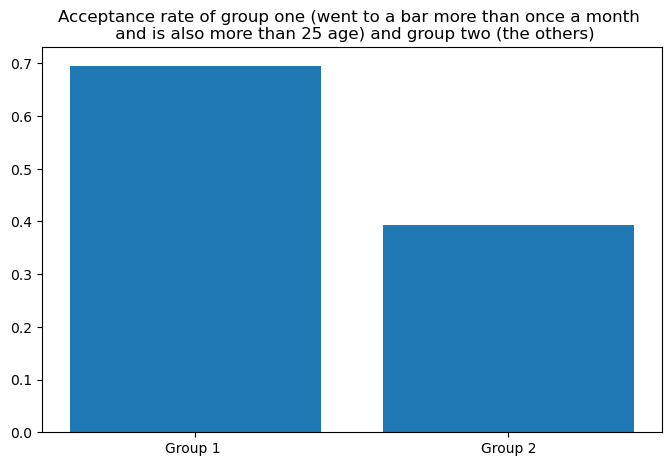

In [269]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.
#Is there a difference

#At first we need to change Bar column from objec to number
coupons_bar.loc[coupons_bar['Bar'] == 'never', 'Bar'] = 0
coupons_bar.loc[coupons_bar['Bar'] == 'less1', 'Bar'] = 1
coupons_bar.loc[coupons_bar['Bar'] == '1~3', 'Bar'] = 3
coupons_bar.loc[coupons_bar['Bar'] == '4~8', 'Bar'] = 4
coupons_bar.loc[coupons_bar['Bar'] == 'gt8', 'Bar'] = 8

# Coupons Accepted for those who went to a bar more than once a month and are also more than 25 (group 1) 
coupons_bar_morethan1_and_agemore25 = coupons_bar[(coupons_bar['Bar'] > 1) & (coupons_bar['age'] > 25)]
accepted_coupons_bar_morethan1_and_agemore25 = coupons_bar_morethan1_and_agemore25['Y'].value_counts()
percent_accepted_group1 = accepted_coupons_bar_morethan1_and_agemore25[1]/(accepted_coupons_bar_morethan1_and_agemore25[0] + accepted_coupons_bar_morethan1_and_agemore25[1])
print ("\n Coupons Accepted for those who went to a bar more than once a month and are also more than 25 is about {:.2f} percent".format(percent_accepted_group1)) 
#print(accepted_coupons_bar_morethan1_and_agemore25)

# Coupons Accepted for the rest went to a bar more than once a month and are also more than 25 (group 2)
coupons_bar_the_rest = coupons_bar[~(coupons_bar['Bar'] > 1) & ~(coupons_bar['age'] > 25)]
accepted_coupons_bar_the_rest = coupons_bar_the_rest['Y'].value_counts()
percent_accepted_group2 = accepted_coupons_bar_the_rest[1]/(accepted_coupons_bar_the_rest[0] + accepted_coupons_bar_the_rest[1])
print ("\n Coupons Accepted by all others is about {:.2f} percent\n".format(percent_accepted_group2)) 


print(" There is remarkable differece of acceptance between two groups (diffrence between them is about {:.2f} percent)".format(percent_accepted_group1-percent_accepted_group2)  )

# histogram of group 1 and group 2
plt.figure(figsize=(8,5))
plt.bar(['Group 1 ', 'Group 2' ], [percent_accepted_group1, percent_accepted_group2])
plt.title ('Acceptance rate of group one (went to a bar more than once a month \n and is also more than 25 age) and group two (the others)')
plt.savefig('figures/go_bar_25_others_bar.png')

plt.show()


5-Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [270]:

# Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestrycoupons_bar_morethan1_and_agemore25 = coupons_bar[(coupons_bar['Bar'] > 1) & (coupons_bar['age'] > 25)]
more1_not_k_farm_fish_frst = coupons_bar[(coupons_bar['Bar'] > 1) & (coupons_bar['passanger'] != 'kid') & (coupons_bar['occupation'] != 'farming-fishing-forestry')]
accepted_coupons_more1_not_k_farm_fish_frst = more1_not_k_farm_fish_frst['Y'].value_counts()
print (accepted_coupons_more1_not_k_farm_fish_frst)
percent_accepted_group3 = accepted_coupons_more1_not_k_farm_fish_frst[1]/(accepted_coupons_more1_not_k_farm_fish_frst[0] + accepted_coupons_more1_not_k_farm_fish_frst[1])
print ("\n Coupons Accepted by drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is about:\n        {:.2f} percent".format(percent_accepted_group3))

Y
1    410
0    186
Name: count, dtype: int64

 Coupons Accepted by drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is about:
        0.69 percent


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [271]:
# Compare the acceptance rates between those drivers who:
print ("Group 1 : go to bars more than once a month, had passengers that were not a kid, and were not widowed")
print ("group 2 : go to bars more than once a month and are under the age of 30") 
print ("group 3 : go to cheap restaurants more than 4 times a month and income is less than 50K")
print ("---------------------")

##################
## group 1

coupons_group1 = coupons_bar[(coupons_bar['Bar'] > 1) & (coupons_bar['maritalStatus'] != 'widowed')  &  (coupons_bar['passanger'] != 'kid')]
accepted_coupons_group1 = coupons_group1['Y'].value_counts()
print("Coupons for group one")
print(accepted_coupons_group1)

percent_accepted_group1 = (accepted_coupons_group1[1]/(accepted_coupons_group1[0] + accepted_coupons_group1[1])) * 100
print ("Coupons Accepted by group one is {:.1f} percent"
       .format(percent_accepted_group1))

##################
## group 2
coupons_group2 = coupons_bar[(coupons_bar['Bar'] > 1) & (coupons_bar['age'] < 30)]
accepted_coupons_group2 = coupons_group2['Y'].value_counts()
print ("---------------------")
print("Coupons for group two")
print(accepted_coupons_group2)

percent_accepted_group2 = (accepted_coupons_group2[1]/(accepted_coupons_group2[0] + accepted_coupons_group2[1])) * 100
print ("Coupons Accepted by group two is {:.1f} percent".format(percent_accepted_group2))

##################
## group 3

# data preparation for group three 
# for both cheap resturant and income 
# cheap resturant , here chp_r, come back to 'Restaurant(<20)' 
       
chp_r = data[data['coupon'] == 'Restaurant(<20)']
chp_r_num = chp_r['coupon'].value_counts()

# number of bar going, changing from string to number 
chp_r.loc[chp_r['RestaurantLessThan20'] == 'never', 'RestaurantLessThan20'] = 0
chp_r.loc[chp_r['RestaurantLessThan20'] == 'less1', 'RestaurantLessThan20'] = 1
chp_r.loc[chp_r['RestaurantLessThan20'] == '1~3', 'RestaurantLessThan20'] = 3
chp_r.loc[chp_r['RestaurantLessThan20'] == '4~8', 'RestaurantLessThan20'] = 4
chp_r.loc[chp_r['RestaurantLessThan20'] == 'gt8', 'RestaurantLessThan20'] = 8

#changing the string of income column to number 
chp_r.loc[chp_r['income'] == 'Less than $12500', 'income'] = 0
chp_r.loc[chp_r['income'] == '$12500 - $24999', 'income'] = 12500
chp_r.loc[chp_r['income'] == '$25000 - $37499', 'income'] = 25000
chp_r.loc[chp_r['income'] == '$37500 - $49999', 'income'] = 37500
chp_r.loc[chp_r['income'] == '$50000 - $62499', 'income'] = 50000
chp_r.loc[chp_r['income'] == '$62500 - $74999', 'income'] = 62500
chp_r.loc[chp_r['income'] == '$75000 - $87499', 'income'] = 75000
chp_r.loc[chp_r['income'] == '$87500 - $99999', 'income'] = 87500
chp_r.loc[chp_r['income'] == '$100000 or More', 'income'] = 100000

#grouping now for group three 
coupons_group3 = chp_r[(chp_r['RestaurantLessThan20'] > 4) & (chp_r['income'] < 50000)]
accepted_coupons_group3 = coupons_group3['Y'].value_counts()

print ("---------------------")
print("Coupons for group three")
print(accepted_coupons_group3)

percent_accepted_group3 = (accepted_coupons_group3[1]/(accepted_coupons_group3[0] + accepted_coupons_group3[1])) * 100
print ("Coupons Accepted by group three is {:.1f} percent".format(percent_accepted_group3))


Group 1 : go to bars more than once a month, had passengers that were not a kid, and were not widowed
group 2 : go to bars more than once a month and are under the age of 30
group 3 : go to cheap restaurants more than 4 times a month and income is less than 50K
---------------------
Coupons for group one
Y
1    410
0    186
Name: count, dtype: int64
Coupons Accepted by group one is 68.8 percent
---------------------
Coupons for group two
Y
1    249
0     96
Name: count, dtype: int64
Coupons Accepted by group two is 72.2 percent
---------------------
Coupons for group three
Y
1    110
0     40
Name: count, dtype: int64
Coupons Accepted by group three is 73.3 percent


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

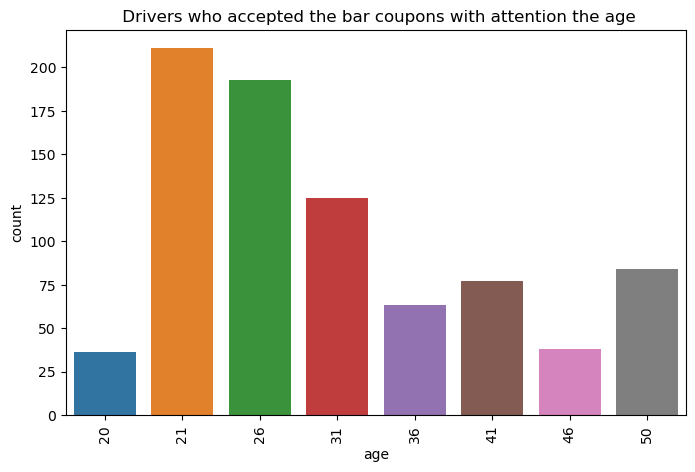

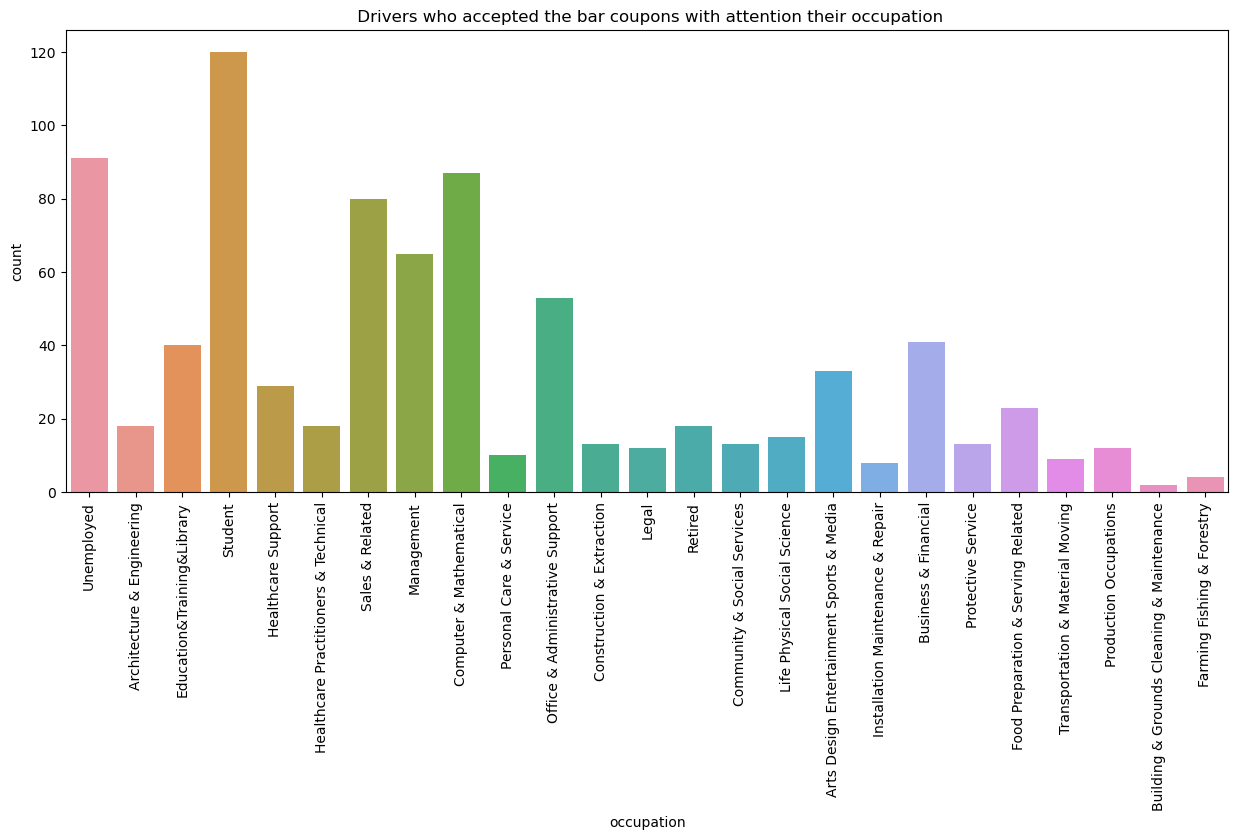

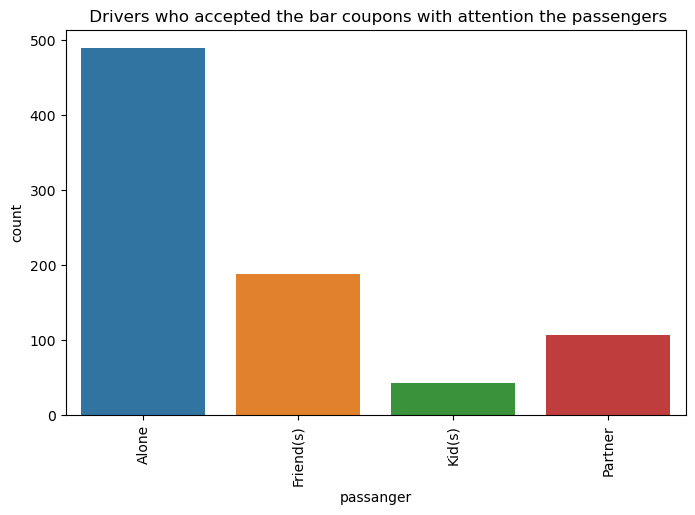

In [280]:
# we should focus on the characteristics of drivers, such as age, occupation, and passanger 

# at first the effect of age on the acceptance of the bar coupons 
plt.figure(figsize=(8,5))
sns.countplot(x='age', data=coupons_bar[coupons_bar['Y'] == 1])
plt.title (" Drivers who accepted the bar coupons with attention the age")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_driver_age_bar.png')
plt.show()

# then check the kind of occupation affect on acceptance of the bar coupons
plt.figure(figsize=(15,6))
sns.countplot(x='occupation', data=coupons_bar[coupons_bar['Y'] == 1])
plt.xticks(rotation= 90)
plt.title (" Drivers who accepted the bar coupons with attention their occupation")
plt.savefig('figures/coupon_driver_occupation_bar.png')
plt.show()

# then check the kind of passanger on the acceptance of the bar coupons 
plt.figure(figsize=(8,5))
sns.countplot(x='passanger', data=coupons_bar[coupons_bar['Y'] == 1])
plt.title (" Drivers who accepted the bar coupons with attention the passengers")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_driver_passenger_bar.png')
plt.show()

#### Results: 
#### 1- Based on these observations, the porbability of accepting the bar coupons for drivers, whose age is 21, 26 or 31 is high. 
#### 2- Based on these observations, the porbability of accepting the bar coupons for the Student and Unemployed drivers are more than others. 
#### 3- Based on these observations, the porbability of accepting the bar coupons for the drivers who are Alone is higher than the others. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

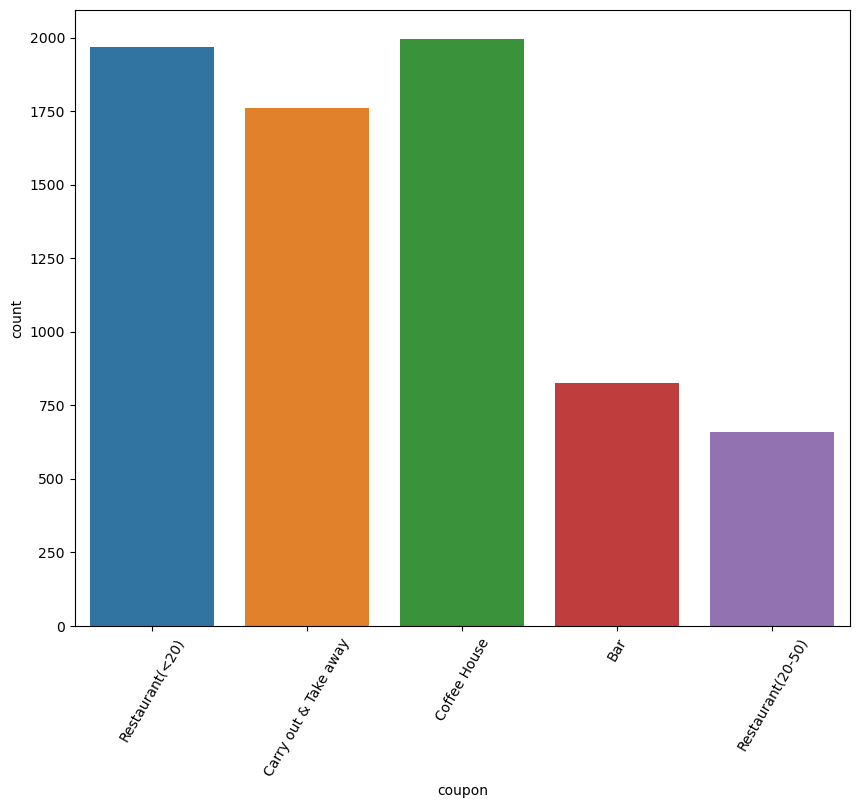

In [287]:
# We check the number of acceptace of coupon in general 
plt.figure(figsize=(10,8))
sns.countplot(x='coupon', data=data[data['Y'] == 1])
plt.xticks(rotation=60)
plt.show()

In [288]:
# As plot shows Coffe House and Restaurant (<20) have more acceptance than others. we chose Coffe House as it has the highest acceptance 
data_co_coffee = data.query('coupon == "Coffee House"')
data_co_coffee.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0,1,0
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,1,0,1,1
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0


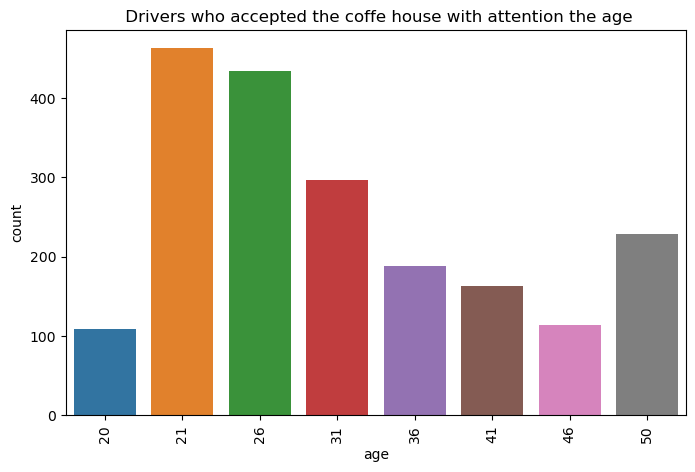

In [279]:
# we check the effect of age on acceptacne 
# at first the effect of age on the acceptance of the coffe house 
plt.figure(figsize=(8,5))
sns.countplot(x='age', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the coffe house with attention the age")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_age_bar.png')
plt.show()

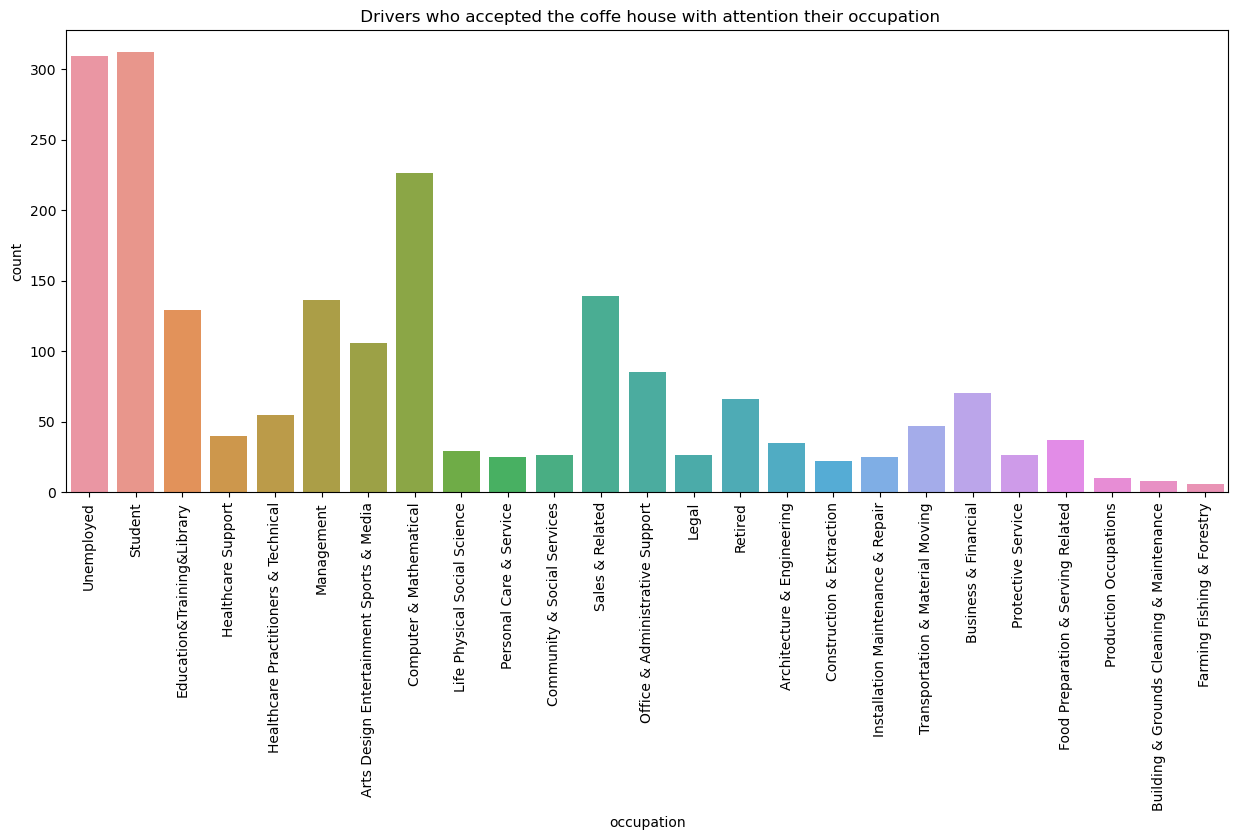

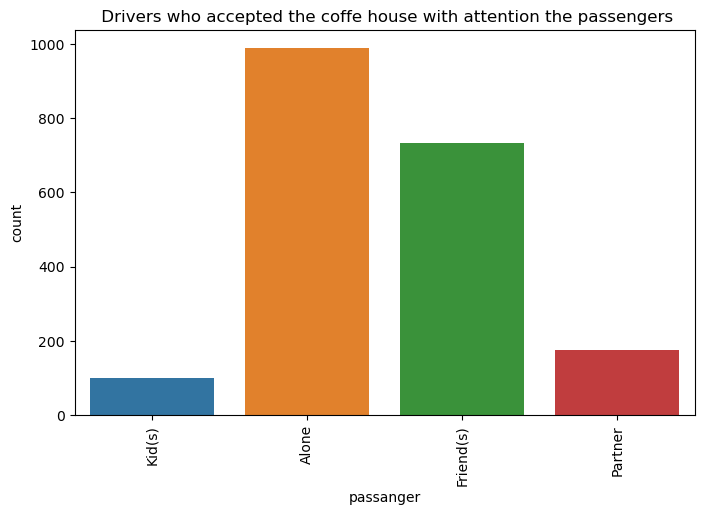

In [290]:
# then check the kind of occupation affect on acceptance of the coffe house
plt.figure(figsize=(15,6))
sns.countplot(x='occupation', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.xticks(rotation= 90)
plt.title (" Drivers who accepted the coffe house with attention their occupation")
plt.savefig('figures/coupon_cofee_driver_occupation_bar.png')
plt.show()

# then check the kind of passanger on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='passanger', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the coffe house with attention the passengers")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_passenger_bar.png')
plt.show()

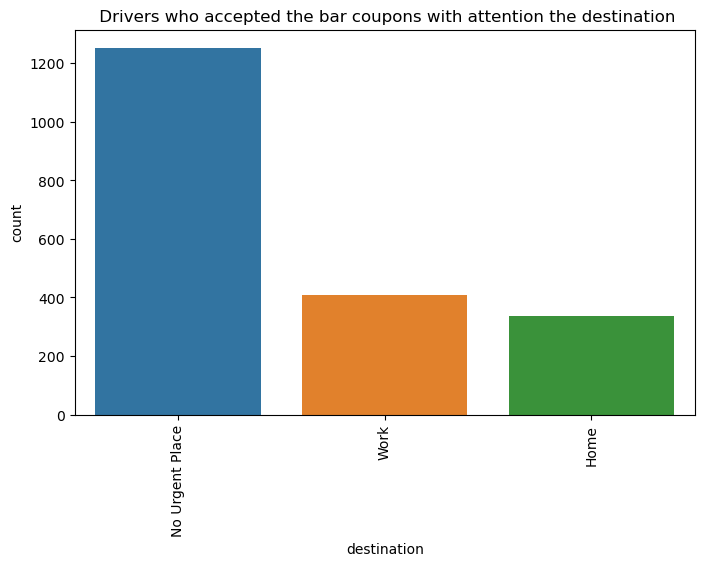

In [282]:
# then check the kind of destination on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='destination', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the bar coupons with attention the destination")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_destination_bar.png')
plt.show()


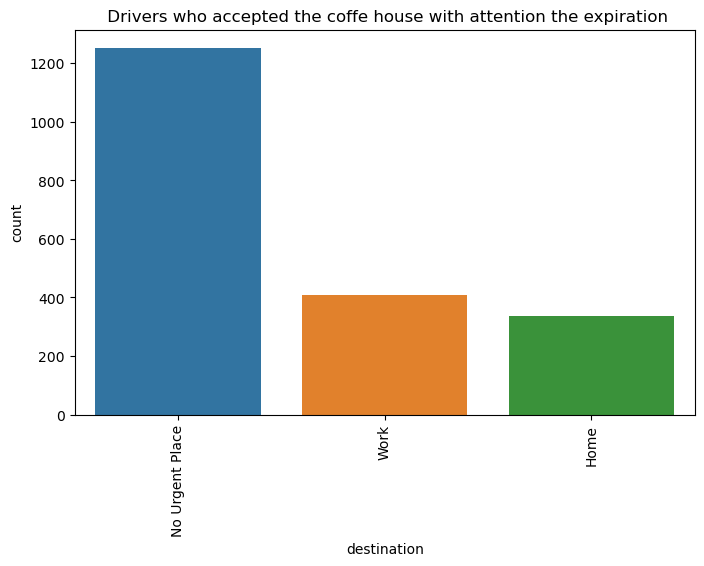

In [291]:
# we aslo check the kind of expiration on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='destination', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the coffe house with attention the expiration")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_expiration_bar.png')
plt.show()

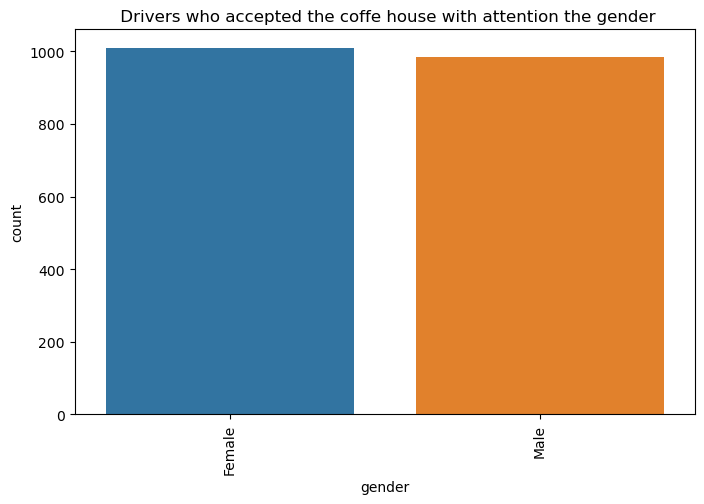

In [292]:
# we  check the affect of gender on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the coffe house with attention the gender")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_gender_bar.png')
plt.show()

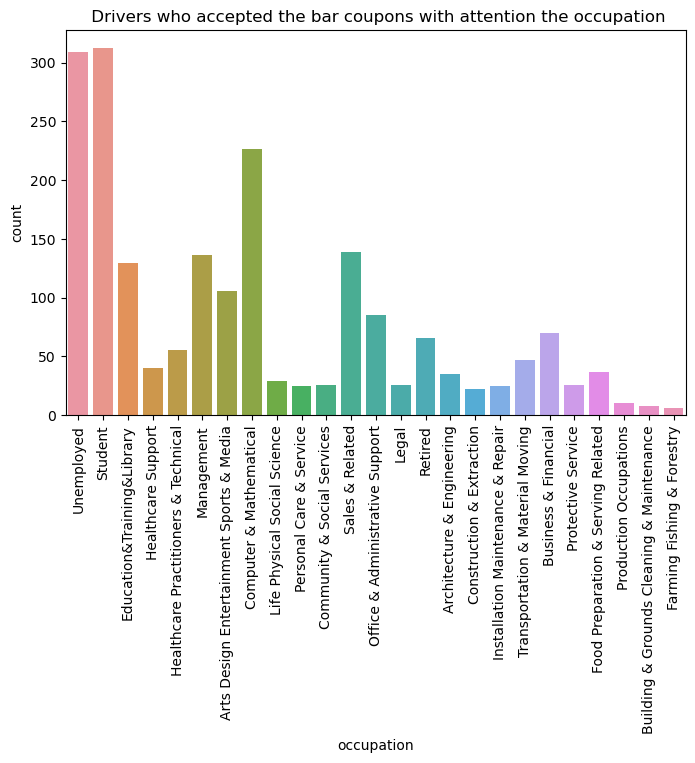

In [295]:
# we  check the affect of occupation on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='occupation', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the bar coupons with attention the occupation")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_occupation_bar.png')
plt.show()

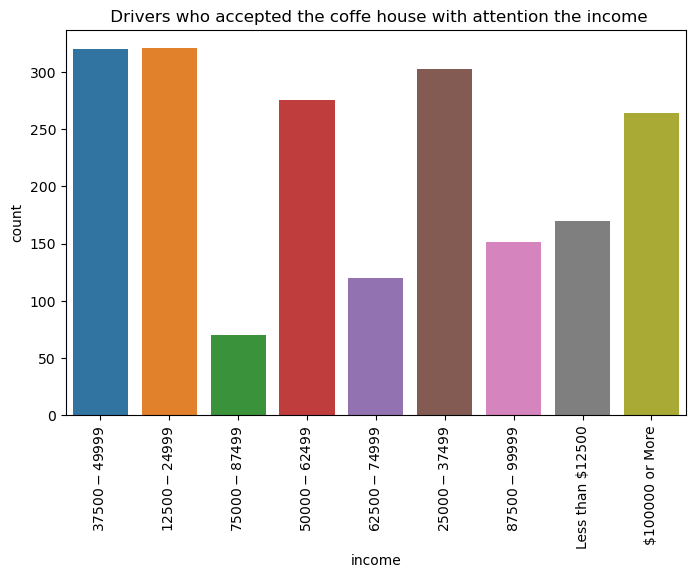

In [293]:
# we  check the affect of income on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='income', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the coffe house with attention the income")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_income_bar.png')
plt.show()

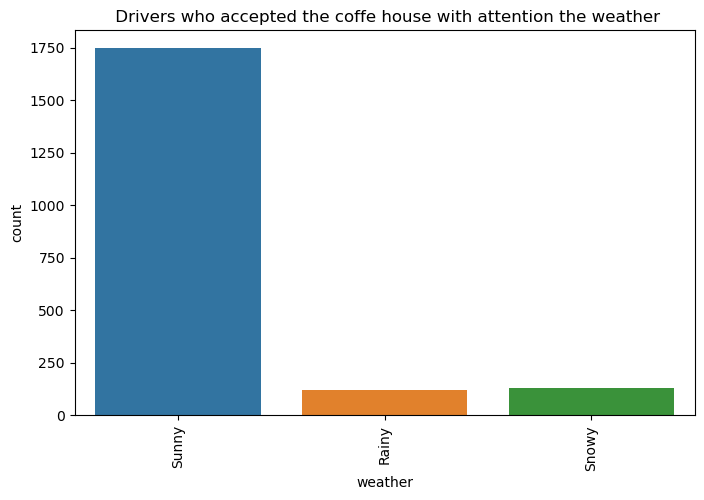

In [297]:
# we  check the affect of weather on the acceptance of the coffe house
plt.figure(figsize=(8,5))
sns.countplot(x='weather', data=data_co_coffee[data_co_coffee['Y'] == 1])
plt.title (" Drivers who accepted the coffe house with attention the weather")
plt.xticks(rotation=90)
plt.savefig('figures/coupon_cofee_driver_weather_bar.png')
plt.show()

### Ressults for accepting the coupon of coffe house by drivers: 
### 1- diver with lower than 25000 have the highe probability to accept 
### 2- Unempployed and Students dirvers are more likely to accpet 
### 3- No ergent place for expiration is more likely to be accepted 
### 4- No ergent place for destination is more likely to be accepted 
### 5- Alone passenger is more likely to be accepted 
### 6- driver with the age of 21 and 26 are more likely to accept
### 7- there is no significant difference between men and women to accpet 
### 8- it is more likely to accept the coupon in sunny weather 
